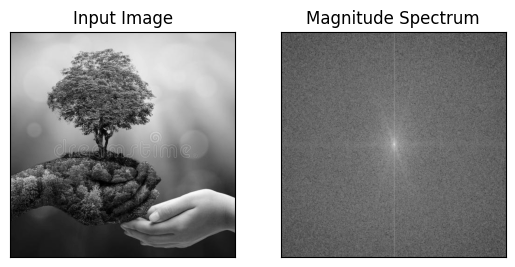

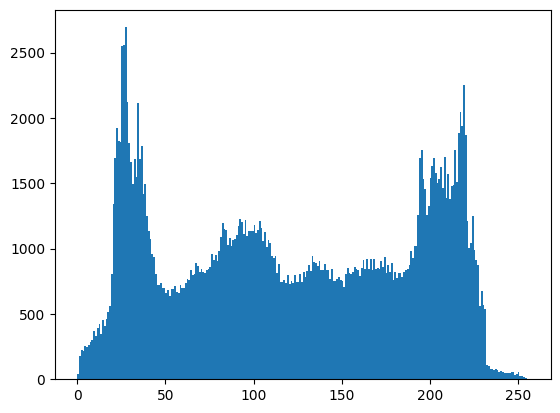

In [1]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Download the image
url = 'https://thumbs.dreamstime.com/b/environment-earth-day-hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-gra-130247647.jpg'
response = requests.get(url)
img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Crop the image to make it square# Crop the image to make it square
height, width = gray.shape
if height > width:
    margin = (height - width) // 2
    gray = gray[margin:margin+width, :]
else:
    margin = (width - height) // 2
    gray = gray[:, margin:margin+height]


# Apply Fourier transform
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Plot the Fourier transform
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
height, width = gray.shape
if height > width:
    margin = (height - width) // 2
    gray = gray[margin:margin+width, :]
else:
    margin = (width - height) // 2
    gray = gray[:, margin:margin+height]

# Plot the histogram of the image
plt.hist(gray.ravel(), 256, [0, 256])
plt.show()